<a href="https://colab.research.google.com/github/JoseAndresEscobar19/Materia_integradora2020I/blob/master/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# import os
# import time
# import scipy
import numpy as np
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
# from keras.models import Model, Sequential
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Cropping2D, ZeroPadding2D, BatchNormalization, Activation, Dropout
# from keras.activations import elu
# from keras.layers.merge import concatenate
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint
# from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as ImageArray
 
!pip install SimpleITK
import SimpleITK as sitk
# import warnings
import cv2
import nibabel as nib
from PIL import Image
 
# K.set_image_data_format('channels_last')
smooth=1.
rows_standard = 200
cols_standard = 200
thresh_FLAIR = 70      #to mask the brain
thresh_T1 = 30

     |████████████████████████████████| 42.5MB 72kB/s 


In [ ]:
rutamodelos="/content/drive/My Drive/Materia_integradora/CodePelaez/neural_nets_experiments/models/"
rutadrive="/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/"

In [ ]:
nombresdf=["calc_case_description_train_set_nii.csv","calc_case_description_test_set_nii.csv",
           "mass_case_description_train_set_nii.csv","mass_case_description_test_set_nii.csv"
           ]
          #  "benign_calc_case_description_train_set_new.csv",
          #  "benign_mass_case_description_train_set_new.csv"]

In [ ]:
# df_mlg_calc=pd.read_csv(rutadrive+nombresdf[0],index_col=0)
# df_mlg_mass=pd.read_csv(rutadrive+nombresdf[1],index_col=0)
 
# df_bng_calc=pd.read_csv(rutadrive+nombresdf[2],index_col=0)
# df_bng_mass=pd.read_csv(rutadrive+nombresdf[3],index_col=0)
 
# df_mass=pd.concat([df_bng_mass.head(50),df_mlg_mass.head(50)],ignore_index=True)
# df_calc=pd.concat([df_mlg_calc.head(50),df_bng_calc.head(50)],ignore_index=True)
# df_calc_train=pd.read_csv(rutadrive+nombresdf[0],index_col=0)
# df_calc_t=pd.read_csv(rutadrive+nombresdf[1],index_col=0)
# df_calc_test=df_calc_t[:int(df_calc_t.shape[0]*0.9)]
# df_calc_val=df_calc_t[int(df_calc_t.shape[0]*0.9):]

# df_mass_train=pd.read_csv(rutadrive+nombresdf[2],index_col=0)
# df_mass_t=pd.read_csv(rutadrive+nombresdf[3],index_col=0)
# df_mass_test=df_mass_t[:int(df_mass_t.shape[0]*0.9)]
# df_mass_val=df_mass_t[int(df_mass_t.shape[0]*0.9):]


df_normals=pd.read_csv(rutadrive+"normal_case_set.csv",index_col=0)
df_normals["pathology"]="NORMAL"
df_normals_train=df_normals[:int(df_normals.shape[0]*0.8)]
df_normals_t=df_normals[int(df_normals.shape[0]*0.8):]
df_normals_test=df_normals_t[:int(df_normals_t.shape[0]*0.9)]
df_normals_val=df_normals_t[int(df_normals_t.shape[0]*0.9):]

In [ ]:
# df_mass=df_mass.sample(frac=1).reset_index(drop=True)
# df_calc=df_calc.sample(frac=1).reset_index(drop=True)
# df_mass_test=df_mass_test.sample(frac=1).reset_index(drop=True)
# df_calc_test=df_calc_test.sample(frac=1).reset_index(drop=True)

In [ ]:
def image_3D(nii_path,max=255):
  """
  Function useful to convert nii.gz to array to a fixed size (224,224)
  Transfrom image with 1 channel GRAYSACALE to 3 channels RGB.
  param path: Path to the file 
  return: PIL image with 3 channels
  """
  #Loads the file usin nibabel
  img = nib.load(nii_path)
  #normalize the image
  data=cv2.normalize(np.asarray(img.dataobj), None, 0, max, cv2.NORM_MINMAX)
  #data=data//150
  img_gray = cv2.cvtColor(data, cv2.COLOR_GRAY2BGR) 
  return img_gray
 
def array_resize_array(data,rows,cols):
  array_img=Image.fromarray(np.rot90(data.astype("uint8"))).resize((rows,cols))#.rotate(-90)
  # array_img = #.rotate(-90)
  img_array=ImageArray.img_to_array(array_img,None,"uint8")
  return img_array

## Pruebas con Libs

In [ ]:
img_scratch = []
roi_scratch = []
for i,j in zip(df_calc.image_path[:100],df_calc.roi_path[:100]):
  img=image_3D(i)
  roi=image_3D(j,1)
  image_path_array=Image.fromarray(img.astype("uint8")).resize((256,256))
  image_array=image.img_to_array(image_path_array,None,"uint8")

  roi_path_array=Image.fromarray(roi.astype("uint8")).resize((256,256))
  roi_array=image.img_to_array(roi_path_array,None,"uint8")
  
  image_f = np.expand_dims(image_array, axis=0)
  # image_f = preprocess_input(image_f)

  roi_f = np.expand_dims(roi_array, axis=0)
  # roi_f = preprocess_input(roi_f)
  # add the image to the batch
  img_scratch.append(image_f)
  roi_scratch.append(roi_f)

In [ ]:
train_images = np.vstack(img_scratch)
train_annotations = np.vstack(roi_scratch)

In [ ]:
# def unet(pretrained_weights = None,input_size = (256,256,1)):
#     inputs = Input(input_size)
#     conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
#     conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
#     conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
#     conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
#     drop4 = Dropout(0.5)(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
#     drop5 = Dropout(0.5)(conv5)

#     up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
#     merge6 = concatenate([drop4,up6], axis = 3)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

#     up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
#     merge7 = concatenate([conv3,up7], axis = 3)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

#     up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
#     merge8 = concatenate([conv2,up8], axis = 3)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

#     up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
#     merge9 = concatenate([conv1,up9], axis = 3)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#     conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#     conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

#     model = Model(inputs = inputs, outputs = conv10)

#     model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
#     #model.summary()

#     if(pretrained_weights):
#     	model.load_weights(pretrained_weights)

#     return model


In [ ]:
# def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
#                     mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
#                     flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
#     '''
#     can generate image and mask at the same time
#     use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
#     if you want to visualize the results of generator, set save_to_dir = "your path"
#     '''
#     image_datagen = ImageDataGenerator(**aug_dict)
#     mask_datagen = ImageDataGenerator(**aug_dict)
#     image_generator = image_datagen.flow_from_directory(
#         train_path,
#         classes = [image_folder],
#         class_mode = None,
#         color_mode = image_color_mode,
#         target_size = target_size,
#         batch_size = batch_size,
#         save_to_dir = save_to_dir,
#         save_prefix  = image_save_prefix,
#         seed = seed)
#     mask_generator = mask_datagen.flow_from_directory(
#         train_path,
#         classes = [mask_folder],
#         class_mode = None,
#         color_mode = mask_color_mode,
#         target_size = target_size,
#         batch_size = batch_size,
#         save_to_dir = save_to_dir,
#         save_prefix  = mask_save_prefix,
#         seed = seed)
#     train_generator = zip(image_generator, mask_generator)
#     for (img,mask) in train_generator:
#         img,mask = adjustData(img,mask,flag_multi_class,num_class)
#         yield (img,mask)

# def adjustData(img,mask,flag_multi_class,num_class):
#     if(flag_multi_class):
#         img = img / 255
#         mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
#         new_mask = np.zeros(mask.shape + (num_class,))
#         for i in range(num_class):
#             #for one pixel in the image, find the class in mask and convert it into one-hot vector
#             #index = np.where(mask == i)
#             #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
#             #new_mask[index_mask] = 1
#             new_mask[mask == i,i] = 1
#         new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
#         mask = new_mask
#     elif(np.max(img) > 1):
#         img = img / 255
#         mask = mask /255
#         mask[mask > 0.5] = 1
#         mask[mask <= 0.5] = 0
#     return (img,mask)

In [ ]:
# data_gen_args = dict(rotation_range=0.2,
#                     width_shift_range=0.05,
#                     height_shift_range=0.05,
#                     shear_range=0.05,
#                     zoom_range=0.05,
#                     horizontal_flip=True,
#                     fill_mode='nearest')
# myGene = trainGenerator(2,'/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/BENIGN','full_mammo','ground_truth',data_gen_args,save_to_dir = None)

# model=unet()

# model.fit_generator(myGene,steps_per_epoch=300,epochs=1)

In [ ]:
# model.fit()

In [ ]:
# model = vgg_unet(n_classes=2 ,  input_height=640, input_width=320  )

# model.train(
#     train_images =  train_images,
#     train_annotations = train_annotations,
#     checkpoints_path = "vgg_unet_1" , epochs=5
# )

# out = model.predict_segmentation(
#     inp="/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/NORMAL/case0002/A_0002_1.LEFT_CC.nii.gz",
#     out_fname="tmp/out.png"
# )

# import matplotlib.pyplot as plt
# plt.imshow(out)

# evaluating the model 
# print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

In [ ]:
# data=[]
# labels=[]

# channels = 1
# classes = [df_normal,df_benigno,df_malignant] # index 0: normal,index 1:benigno, index 2: maligno
# n_classes= 3
# n_inputs = rows_standard * cols_standard * channels

# for i,clase in enumerate(classes):
#   print(i)
#   for path in clase["image file path"]:
#     try:
#       image=cv2.imread(path)
#       image_from_array = Image.fromarray(image)
#       size_image = image_from_array.resize((rows_standard, cols_standard))
#       # plt.imshow(size_image)
#       data.append(np.array(size_image))
#       labels.append(i)
#     except AttributeError:
#         print("ERROR en "+path)
# Cells=np.array(data)
# labels=np.array(labels)

In [ ]:
#Randomize the order of the input images
# s=np.arange(Cells.shape[0])
# np.random.seed(n_classes)
# np.random.shuffle(s)
# Cells=Cells[s]
# labels=labels[s]

In [ ]:
# (X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
# X_train = X_train.astype('float32')/255 
# X_val = X_val.astype('float32')/255
# (y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

In [ ]:
# from keras.utils import to_categorical
# y_train = to_categorical(y_train, n_classes)
# y_val = to_categorical(y_val, n_classes)

In [ ]:
# print(X_train.shape,X_val.shape)
# print(y_val.shape,y_train.shape)

(240, 200, 200, 3) (60, 200, 200, 3)
(60, 3) (240, 3)


## Pruebas codigo profe Pelaez

In [ ]:
def dice_coef_for_training(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1.-dice_coef_for_training(y_true, y_pred)

def conv_bn_relu(nd, k=3, inputs=None):
    conv = Conv2D(nd, k, padding='same')(inputs) #, kernel_initializer='he_normal'
    #bn = BatchNormalization()(conv)
    relu = Activation('relu')(conv)
    return relu

def conv_elu(nd, k=3, inputs=None):
    conv = Conv2D(nd, k, padding='same', kernel_initializer='he_normal')(inputs) #, kernel_initializer='he_normal'
    eluVar = Activation('elu')(conv)
    return eluVar

def get_crop_shape(target, refer):
    # width, the 3rd dimension
    cw = (target.get_shape()[2] - refer.get_shape()[2])
    assert (cw >= 0)
    if cw % 2 != 0:
        cw1, cw2 = int(cw/2), int(cw/2) + 1
    else:
        cw1, cw2 = int(cw/2), int(cw/2)
    # height, the 2nd dimension
    ch = (target.get_shape()[1] - refer.get_shape()[1])
    assert (ch >= 0)
    if ch % 2 != 0:
        ch1, ch2 = int(ch/2), int(ch/2) + 1
    else:
        ch1, ch2 = int(ch/2), int(ch/2)

    return (ch1, ch2), (cw1, cw2)

def get_unet_3(img_shape = None, first5=True):
    inputs = Input(shape = img_shape)
    concat_axis = -1

    if first5: filters = 5
    else: filters = 3
    conv1 = conv_elu(64, filters, inputs)
    conv1 = conv_elu(64, filters, conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv3 = conv_elu(128, 3, pool1)
    conv3 = conv_elu(128, 3, conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = conv_elu(256, 3, pool3)
    conv4 = conv_elu(256, 4, conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = conv_elu(512, 3, pool4)
    conv5 = conv_elu(512, 3, conv5)

    up_conv5 = UpSampling2D(size=(2, 2))(conv5)
    ch, cw = get_crop_shape(conv4, up_conv5)
    crop_conv4 = Cropping2D(cropping=(ch,cw))(conv4)
    up6 = concatenate([up_conv5, crop_conv4], axis=concat_axis)
    conv6 = conv_elu(256, 3, up6)
    conv6 = conv_elu(256, 3, conv6)

    up_conv6 = UpSampling2D(size=(2, 2))(conv6)
    ch, cw = get_crop_shape(conv3, up_conv6)
    crop_conv3 = Cropping2D(cropping=(ch,cw))(conv3)
    up7 = concatenate([up_conv6, crop_conv3], axis=concat_axis)
    conv7 = conv_elu(128, 3, up7)
    conv7 = conv_elu(128, 3, conv7)

    up_conv8 = UpSampling2D(size=(2, 2))(conv7)
    ch, cw = get_crop_shape(conv1, up_conv8)
    crop_conv1 = Cropping2D(cropping=(ch,cw))(conv1)
    up9 = concatenate([up_conv8, crop_conv1], axis=concat_axis)
    conv9 = conv_elu(64, 3, up9)
    conv9 = conv_elu(64, 3, conv9)

    ch, cw = get_crop_shape(inputs, conv9)
    conv9 = ZeroPadding2D(padding=(ch, cw))(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid', padding='same', kernel_initializer='he_normal')(conv9) #, kernel_initializer='he_normal'
    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=Adam(lr=(2e-4)), loss=dice_coef_loss)

    return model

def train_all_85_15_unet_3(images, masks, flair=True, t1=False, first5=True, aug=False, verbose=False):
    # images_delete = [5,7,19,25,26,32] # actual images will be 5, 8, 21, 28, 30, 37
    # images_delete_2 = [41,50,51] # 47, 57, 58
    # for test_1 in images_delete:
        # images = np.delete(images, range(test_1*38, (test_1+1)*38), axis=0)
        # masks = np.delete(masks, range(test_1*38, (test_1+1)*38), axis=0)
    # for test_2 in images_delete_2:
        # images = np.delete(images, range(1520+(test_2-40)*63, 1520+(test_2-39)*63), axis=0)
        # masks = np.delete(masks, range(1520+(test_2-40)*63, 1520+(test_2-39)*63), axis=0)
    if aug:
        images = np.concatenate((images, images[..., ::-1, :]), axis=0)
        masks = np.concatenate((masks, masks[..., ::-1, :]), axis=0)
    samples_num = images.shape[0]
    print(samples_num)
    row = images.shape[0]
    col = images.shape[1]
    if aug: epoch = 50
    else: epoch = 200
    batch_size = 30

    img_shape = (row, col, 3)

    model = get_unet_3(img_shape, first5)
    current_epoch = 1
    while current_epoch <= epoch:
        print('Epoch ', str(current_epoch), '/', str(epoch))
        if aug:
            images_aug = np.zeros(images.shape, dtype=np.float32)
            masks_aug = np.zeros(masks.shape, dtype=np.float32)
            for i in range(samples_num):
                images_aug[i, ..., 0], images_aug[i, ..., 1], masks_aug[i, ..., 0] = augmentation(images[i, ..., 0], images[i, ..., 1], masks[i, ..., 0])
            image = np.concatenate((images, images_aug), axis=0)
            mask = np.concatenate((masks, masks_aug), axis=0)
        else:
            image = images.copy()
            mask = masks.copy()
            print(image.shape)
            print(mask.shape)
        # if not flair: image = image[..., 1:2].copy()
        # if not t1: image = image[..., 0:1].copy()
        history = model.fit(image, mask, batch_size=batch_size, epochs=1, verbose=verbose, shuffle=True)
        current_epoch += 1
        if history.history['loss'][-1] > 0.99:
            model = get_unet_3(img_shape, first5)
            current_epoch = 1
    model_path = 'models/'
    if not os.path.exists(model_path):
        os.mkdir(model_path)
    model_path += 'Full_'
    model_path += ''
    if flair: model_path += 'Flair_'
    if t1: model_path += 'T1_'
    if first5: model_path += '5_'
    else: model_path += '3_'
    if aug: model_path += 'Augmentation/'
    else: model_path += 'No_Augmentation/'
    if not os.path.exists(model_path):
        os.mkdir(model_path)
    model_path += str('_85_15_unet3') + '.h5'
    model.save_weights(model_path)
    print('Model saved to ', model_path)

# train with 85 15 with unet_3
def let_see_8():
    patient=0
    patient_num = 60
    array_of_images = np.zeros((0,0,0), dtype=float)
    array_of_masks = np.zeros((0,0,0), dtype=float)
    for img_path,mask_path in zip(df_mass.image_path[:2],df_mass.roi_path[:2]):
        # image_path_flair_path = '../../Data/flair_pre/' + str(patient) + name + '.nii.gz'
        img=image_3D(img_path)
        image_path_array=Image.fromarray(img.astype("uint8")).resize((rows_standard,cols_standard))
        image_path_array=image.img_to_array(image_path_array,None,"uint8")
        image_path_array = image_path_array[..., np.newaxis]

        mask_image=image_3D(img_path)
        mask_image=Image.fromarray(mask_image.astype("uint8")).resize((rows_standard,cols_standard))
        mask_image_array=image.img_to_array(mask_image,None,"uint8")
        mask_image_array = mask_image_array[..., np.newaxis]

        if patient == 0:
            array_of_images = image_path_array
            array_of_masks = mask_image_array
        else:
            array_of_images = np.concatenate((array_of_images, image_path_array), axis=0)
            array_of_masks = np.concatenate((array_of_masks, mask_image_array), axis=0)
        # np.concatenate((array_of_masks, mask_image_array), axis=0)
        patient+=1
    print(array_of_images.shape)
    print(array_of_masks.shape)
    train_all_85_15_unet_3(array_of_images, array_of_masks,False)



In [ ]:
let_see_8()

(400, 200, 3, 1)
(400, 200, 3, 1)
400
Epoch  1 / 200
(400, 200, 3, 1)
(400, 200, 3, 1)


ValueError: ignored

In [ ]:
# model.load_weights(rutamodelos+"unet3/_85_15_unet3.h5")

In [ ]:
#Compilation of the model

# model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 200, 64) 4864        input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 200, 200, 64) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 200, 200, 64) 102464      activation_1[0][0]               
____________________________________________________________________________________________

In [ ]:
# data_gen_args = dict(
#     #featurewise_center=True,
#     #featurewise_std_normalization=True,
#     #rotation_range=20,
#     #width_shift_range=0.15,
#     #height_shift_range=0.15,
#     # rotation_range = 10,
#     # zoom_range = 0.15,
#     # width_shift_range = 0.2,
#     # height_shift_range = 0.2,
#     # shear_range = 0.15,
#     horizontal_flip = False,
#     vertical_flip = True,
#     # fill_mode = "nearest"
#     )
# datagen = ImageDataGenerator(**data_gen_args)
# #val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# datagen.fit(X_train)
# #val_datagen.fit(X_val)

In [ ]:
# epochs = 50
# batch_size=30
# history=model.fit(X_train, y_train, batch_size=batch_size,
#                             epochs=epochs, 
#                             # validation_data=(X_val,y_val),
#                             shuffle=True,
#                             verbose = 1)

In [ ]:

# plt.figure(0)
# plt.plot(history.history['acc'], label='training accuracy')
# plt.plot(history.history['val_acc'], label='val accuracy')
# plt.title('Accuracy')
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.legend()

# plt.figure(1)
# plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.title('Loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()


## Probando otro

In [ ]:
%pip install keras-unet

In [ ]:
# imgs_list = []
# masks_list = []
# for image, mask in zip(df_mass.image_path[:100], df_mass.roi_path[:100]):
#     print(image)
#     img=nib.load(image)
#     roi=nib.load(mask)
#     img_data=cv2.normalize(np.asarray(img.dataobj), None, 0, 255, cv2.NORM_MINMAX)
#     roi_data=cv2.normalize(np.asarray(roi.dataobj), None, 0, 1, cv2.NORM_MINMAX)
#     imgs_list.append(np.array(Image.fromarray(img_data.astype("uint8"),mode="L").resize((512,512)).rotate(90)))
#     im = Image.fromarray(roi_data.astype("uint8"),mode="L").resize((512,512)).rotate(90)
#     #width, height = im.size   # Get dimensions

#     #left = (width - 388)/2
#     #top = (height - 388)/2
#     #right = (width + 388)/2
#     #bottom = (height + 388)/2

#     #im_cropped = im.crop((left, top, right, bottom))
#     masks_list.append(np.array(im))

# imgs_np = np.asarray(imgs_list)
# masks_np = np.asarray(masks_list)

In [ ]:
import pickle
with open(rutadrive+'data_masa_mask_roi_train.pickle', 'rb') as handle:
    imgs_np_masa,masks_np_masa = pickle.load(handle)

with open(rutadrive+'data_masa_mask_roi_test.pickle', 'rb') as handle:
    imgs_np_calc,masks_np_calc = pickle.load(handle)

# with open(rutadrive+'data_normal_mask_roi_train.pickle', 'rb') as handle:
#     imgs_np_norm,masks_np_norm = pickle.load(handle)

In [ ]:
imgs=[]
for i in imgs_np_masa:
  imgs.append(i)
for i in imgs_np_calc:
  imgs.append(i)
# for i in imgs_np_norm:
#   imgs.append(i)

rois=[]
for i in masks_np_masa:
  rois.append(i)
for i in masks_np_calc:
  rois.append(i)
# for i in masks_np_norm:
#   rois.append(i)

np.random.seed(42)
np.random.shuffle(imgs)  
np.random.seed(42)
np.random.shuffle(rois)  

imgs_np,masks_np = np.array(imgs),np.array(rois)

In [ ]:
imgs_np = np.array([cv2.cvtColor(im,cv2.COLOR_RGB2GRAY) for im in imgs_np])
masks_np = np.array([cv2.cvtColor(im,cv2.COLOR_RGB2GRAY) for im in masks_np])

In [ ]:
print(imgs_np.shape, masks_np.shape)

(1464, 224, 224) (1464, 224, 224)


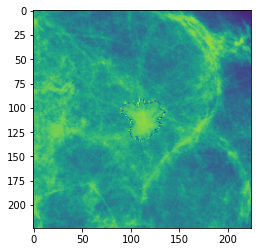

In [ ]:
plt.imshow(masks_np[4]+imgs_np[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

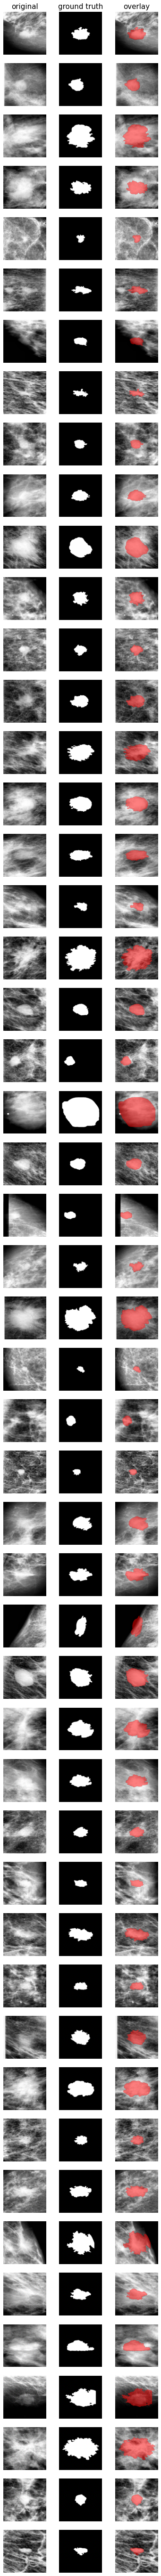

In [ ]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=imgs_np, mask_imgs=masks_np, nm_img_to_plot=50, figsize=2)

In [ ]:
print(imgs_np.max(), masks_np.max())

255 255


In [ ]:
x = np.asarray(imgs_np, dtype=np.float32)/255
y = np.asarray(masks_np, dtype=np.float32)/255

In [ ]:
print(x.max(), y.max())

1.0 1.0


In [ ]:
print(x.shape, y.shape)

(1464, 224, 224) (1464, 224, 224)


In [ ]:
y = y.reshape(y.shape[0], y.shape[1], y.shape[2], 1)
print(x.shape, y.shape)

(1464, 224, 224) (1464, 224, 224, 1)


In [ ]:
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
print(x.shape, y.shape)

(1464, 224, 224, 1) (1464, 224, 224, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (1171, 224, 224, 1)
y_train:  (1171, 224, 224, 1)
x_val:  (293, 224, 224, 1)
y_val:  (293, 224, 224, 1)


In [ ]:
from keras_unet.utils import get_augmented

train_gen = get_augmented(
    x_train, y_train, batch_size=2,
    data_gen_args = dict(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        # shear_range=50,
        # zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect'
    ))

(2, 224, 224, 1) (2, 224, 224, 1)


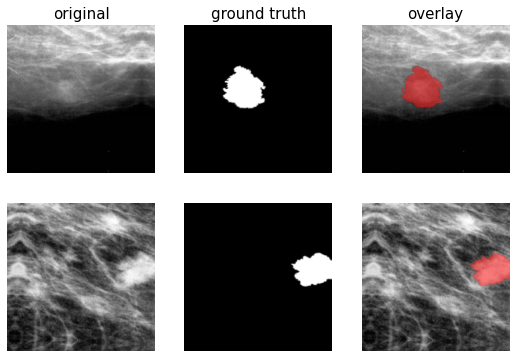

In [ ]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=3, figsize=3)

In [ ]:
from keras_unet.models import custom_unet
 
input_shape = x_train[0].shape
# model=vanilla_unet(input_shape)
model = custom_unet(
    input_shape,
    use_batch_norm=True,
    num_classes=1,
    filters=64,
    dropout=0.25,
    output_activation='sigmoid'
)

In [ ]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 224, 224, 64) 576         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 64) 256         conv2d_57[0][0]                  
__________________________________________________________________________________________________
spatial_dropout2d_15 (SpatialDr (None, 224, 224, 64) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [115]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
 
model_filename = 'segm_model_masa_norm.h5'
callback_checkpoint = ModelCheckpoint(
    model_filename, 
    verbose=1, 
    monitor='val_loss', 
    save_best_only=True,
)
callback_reducelr=ReduceLROnPlateau(patience=5,factor=0.2, min_lr=1e-7)

In [ ]:
from tensorflow import optimizers
from keras_unet.metrics import iou,iou_thresholded
from keras_unet.losses import jaccard_distance
 
model.compile(
    # optimizer=optimizers.Adam(lr = 0.001), 
    optimizer=optimizers.SGD(lr=0.001, momentum=0.99),
    loss='binary_crossentropy',
    # loss=jaccard_distance,
    metrics=[iou, iou_thresholded]
)

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=x_train.shape[0]//2,
    epochs=20,
    
    validation_data=(x_val, y_val),
    callbacks=[callback_checkpoint,callback_reducelr]
)

Epoch 1/50
585/585 [==============================] - ETA: 0s - loss: 0.1922 - iou: 0.2869 - iou_thresholded: 0.4066
Epoch 00001: val_loss improved from inf to 0.21129, saving model to segm_model_masa_norm.h5
585/585 [==============================] - 76s 129ms/step - loss: 0.1922 - iou: 0.2869 - iou_thresholded: 0.4066 - val_loss: 0.2113 - val_iou: 0.2939 - val_iou_thresholded: 0.4889
Epoch 2/50
585/585 [==============================] - ETA: 0s - loss: 0.1782 - iou: 0.3255 - iou_thresholded: 0.4567
Epoch 00002: val_loss improved from 0.21129 to 0.16269, saving model to segm_model_masa_norm.h5
585/585 [==============================] - 76s 130ms/step - loss: 0.1782 - iou: 0.3255 - iou_thresholded: 0.4567 - val_loss: 0.1627 - val_iou: 0.3985 - val_iou_thresholded: 0.5062
Epoch 3/50
585/585 [==============================] - ETA: 0s - loss: 0.1737 - iou: 0.3540 - iou_thresholded: 0.4878
Epoch 00003: val_loss did not improve from 0.16269
585/585 [==============================] - 76s 129

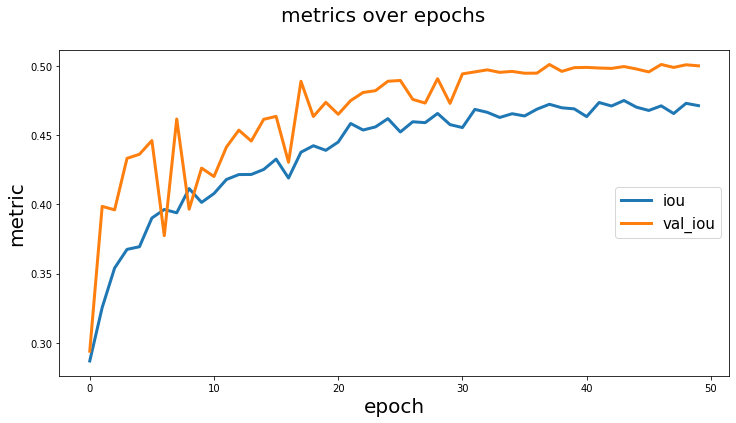

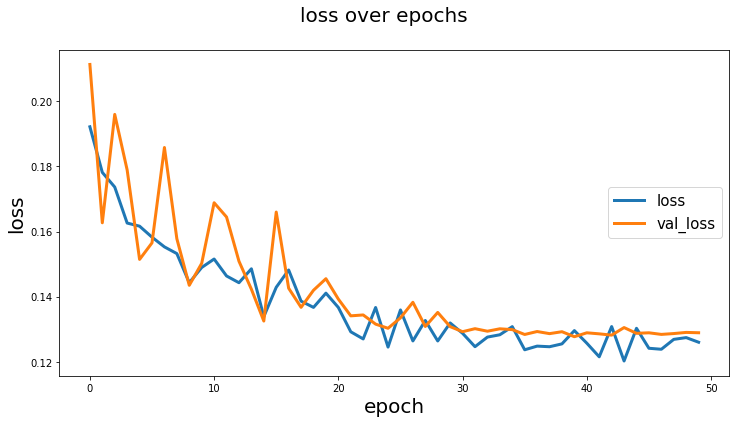

In [ ]:
from keras_unet.utils import plot_segm_history
plot_segm_history(history)

In [111]:
!cp segm_model_masa_norm.h5 "/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS"

In [114]:
model.save(rutadrive+"segm_model_masav2.h5")

In [112]:
model_loaded = model
#model_loaded.load_weights(model_filename)
y_pred = model_loaded.predict(x_val)

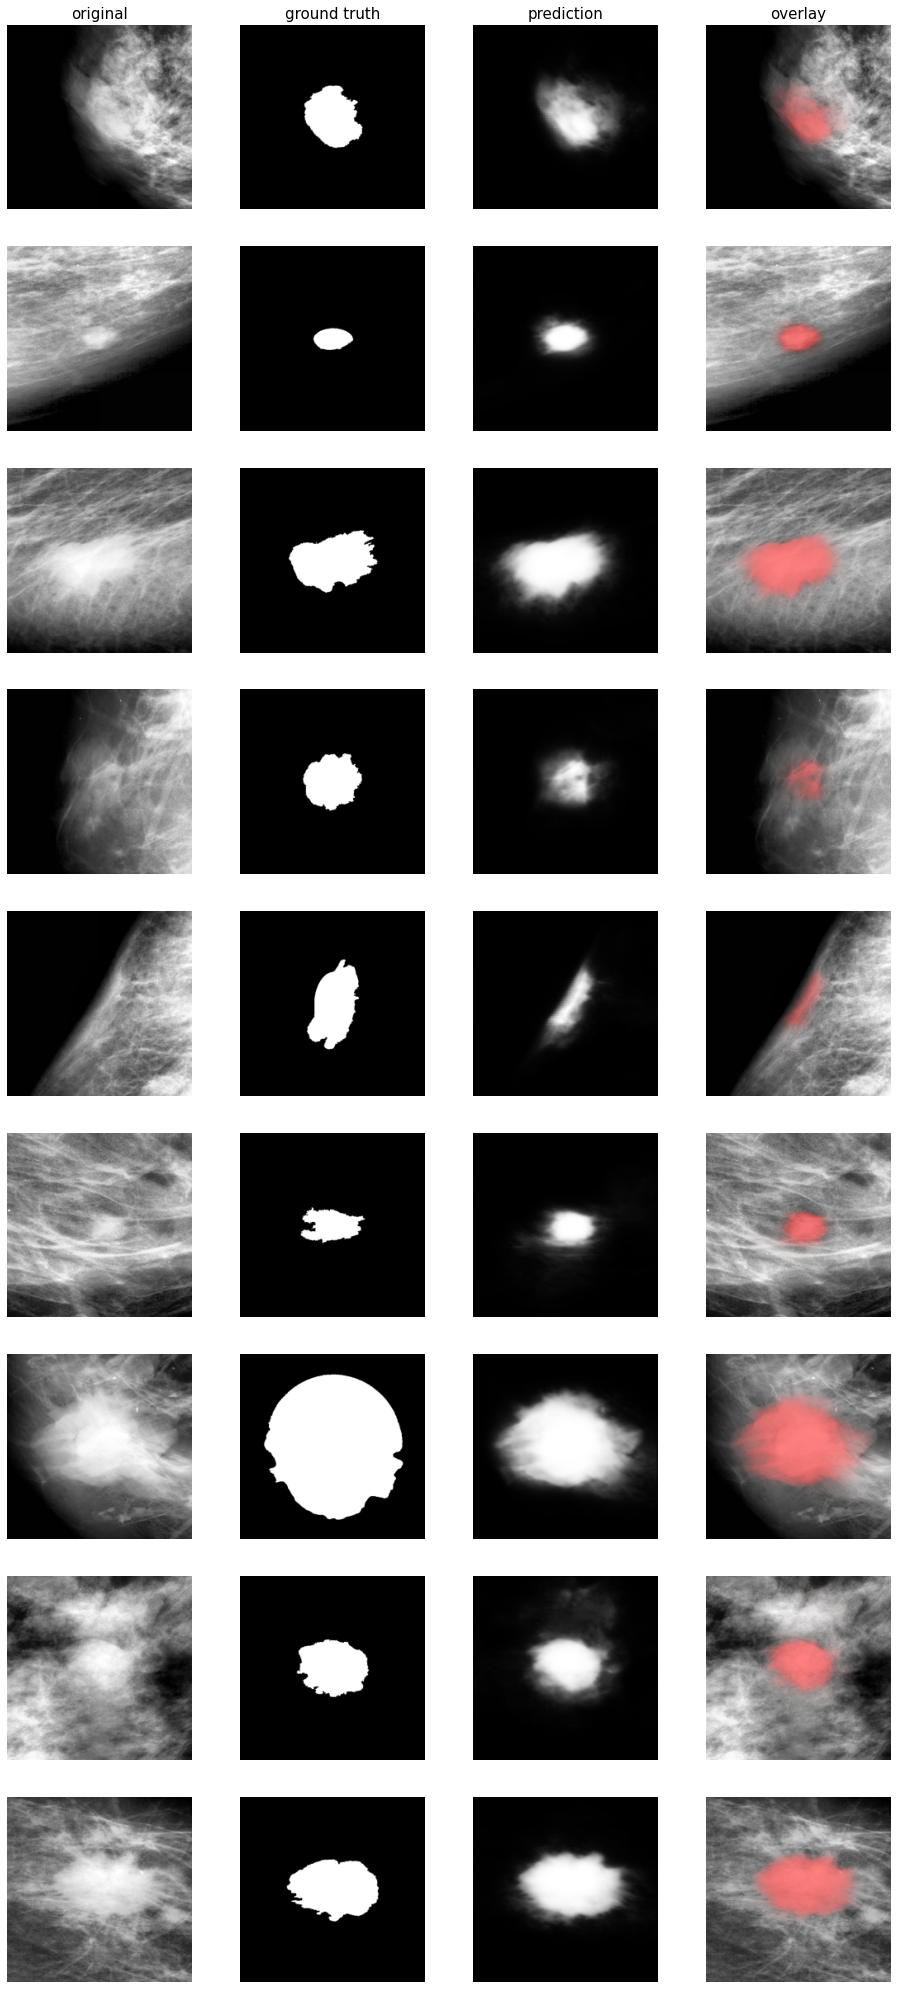

In [113]:
from keras_unet.utils import plot_imgs
plot_imgs(org_imgs=x_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=9)

# Meeehhh...

In [ ]:
import torch
import torch.nn as nn
 
class Channel_Attention(nn.Module):
    def __init__(self, channel, reduction=16):
        super(Channel_Attention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
                nn.Linear(channel, channel // reduction),
                nn.ReLU(inplace=True),
                nn.Linear(channel // reduction, channel),
                nn.Sigmoid()
        )
 
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y
 
def UNet_up_conv_bn_relu(input_channel, output_channel, learned_bilinear=False):
 
    if learned_bilinear:
        return nn.Sequential(nn.ConvTranspose2d(input_channel, output_channel, kernel_size=2, stride=2),
                             nn.BatchNorm2d(output_channel),
                             nn.ReLU())
    else:
        return nn.Sequential(nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                             nn.Conv2d(input_channel, output_channel, kernel_size=3, padding=1),
                             nn.BatchNorm2d(output_channel),
                             nn.ReLU())
 
class basic_block(nn.Module):
    def __init__(self, input_channel, output_channel):
        super(basic_block, self).__init__()
        self.conv1 = nn.Conv2d(input_channel, output_channel, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(output_channel)
        self.conv2 = nn.Conv2d(output_channel, output_channel, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(output_channel)
        self.relu = nn.ReLU()
 
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        return x
 
class residual_block(nn.Module):
    def __init__(self, input_channel, output_channel):
        super(residual_block, self).__init__()
        self.conv1 = nn.Conv2d(input_channel, output_channel, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(output_channel)
        self.conv2 = nn.Conv2d(output_channel, output_channel, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(output_channel)
        self.conv3 = nn.Conv2d(output_channel, output_channel, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(output_channel)
        self.relu = nn.ReLU()
 
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        residual = x
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.bn3(self.conv3(x))
        out = self.relu(x + residual)
        return out
 
class UNet_residual_down_block(nn.Module):
    def __init__(self, input_channel, output_channel, down_size):
        super(UNet_residual_down_block, self).__init__()
        self.block = residual_block(input_channel, output_channel)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.down_size = down_size
 
    def forward(self, x):
        if self.down_size:
            x = self.max_pool(x)
        x = self.block(x)
        return x
 
#################### Attention_UP_Net ##############################
 
class Attention_Up_block(nn.Module):
    def __init__(self, input_channel, prev_channel, output_channel, learned_bilinear=False):
        super(Attention_Up_block, self).__init__()
        self.bilinear_up = UNet_up_conv_bn_relu(input_channel, prev_channel, learned_bilinear)
        self.add_channel_conv = nn.Sequential(nn.Conv2d(input_channel, input_channel*2, kernel_size=3, padding=1),
                                              nn.BatchNorm2d(input_channel*2),
                                              nn.ReLU())
        self.pixel_shuffle = nn.PixelShuffle(upscale_factor=2)
        self.smooth_conv = nn.Sequential(nn.Conv2d(prev_channel, prev_channel, kernel_size=3, padding=1),
                                         nn.BatchNorm2d(prev_channel),
                                         nn.ReLU())
        self.block = basic_block(prev_channel*2, output_channel)
        self.CA = Channel_Attention(prev_channel*2, reduction=16)
 
    def forward(self, pre_feature_map, x):
        x_bilinear = self.bilinear_up(x)
        x_ps = self.pixel_shuffle(self.add_channel_conv(x))
        x = self.smooth_conv((pre_feature_map + x_ps))
        x = self.CA(torch.cat((x, x_bilinear), dim=1))
        x = self.block(x)
        return x
 
 
class AUNet_R16(nn.Module):
    def __init__(self, colordim=3, n_classes=2, learned_bilinear=False):
        super(AUNet_R16, self).__init__()
 
        self.down_block1 = UNet_residual_down_block(colordim, 64, False)
        self.down_block2 = UNet_residual_down_block(64, 128, True)
        self.down_block3 = UNet_residual_down_block(128, 256, True)
        self.down_block4 = UNet_residual_down_block(256, 512, True)
        self.down_block5 = UNet_residual_down_block(512, 1024, True)
 
        self.up_block1 = Attention_Up_block(1024, 512, 512, learned_bilinear)
        self.up_block2 = Attention_Up_block(512, 256, 256, learned_bilinear)
        self.up_block3 = Attention_Up_block(256, 128, 128, learned_bilinear)
        self.up_block4 = Attention_Up_block(128, 64, 64, learned_bilinear)
 
        self.last_conv1 = nn.Conv2d(64, n_classes, 1, padding=0)
 
    def forward(self, x):
        x1 = self.down_block1(x)
        x2 = self.down_block2(x1)
        x3 = self.down_block3(x2)
        x4 = self.down_block4(x3)
        x5 = self.down_block5(x4)
 
        x = self.up_block1(x4, x5)
        x = self.up_block2(x3, x)
        x = self.up_block3(x2, x)
        x = self.up_block4(x1, x)
 
        x = self.last_conv1(x)
        return x

In [ ]:
model=AUNet_R16()

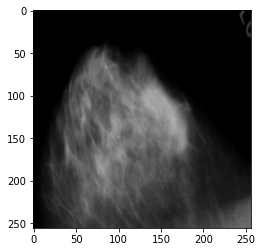

In [ ]:
array_3ch=image_3D(df_calc.[10])
data=array_3ch[int(array_3ch.shape[0]*0.1):int(array_3ch.shape[0]*0.9),int(array_3ch.shape[1]*0.1):int(array_3ch.shape[1]*0.9)]
img_as_array=array_resize_array(data,256,256)
plt.imshow(img_as_array)

In [ ]:
ind=np.where(data==0)

In [ ]:
np.unique(ind[0])

array([   0,    1,    2, ..., 2218, 2219, 2220])

In [ ]:
# (data[0]<)==True
True in (data[0]>2220)

False

# ........

In [ ]:
import os
df_mass_org=pd.read_csv(rutadrive+"calc_case_description_test_set.csv", index_col=0)

In [ ]:
df_mass_org

,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
patient_id,,,,,,,,,,,,,
P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_02464,2,RIGHT,MLO,1,calcification,FINE_LINEAR_BRANCHING,CLUSTERED,0,MALIGNANT,4,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...
P_02498,4,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....
P_02498,4,RIGHT,MLO,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [ ]:
df_mass.sort_values(by=["patient_name"],inplace=True)

In [ ]:
df_mass_org.reset_index(drop=True,inplace=True)
df_mass_org

,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2,RIGHT,MLO,1,calcification,FINE_LINEAR_BRANCHING,CLUSTERED,0,MALIGNANT,4,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...
322,4,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....
323,4,RIGHT,MLO,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...
324,3,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [ ]:
df_mass_org["pp"]=df_mass_org["image file path"].apply(lambda x: "/".join(x.split("/")[::2])+"/"+"full_mammo.nii.gz")
df_mass_org["tmp"]=df_mass_org["image file path"].apply(lambda x: x.split("/")[0])
df_mass_org["pe"]=df_mass_org["ROI mask file path"].apply(lambda x: x.split("/")[2])
df_mass_org["img_path_drive"]=rutadrive+df_mass_org["pathology"]+"/full_mammo/"+df_mass_org["pp"]
df_mass_org["roi_path_drive"]=rutadrive+df_mass_org["pathology"]+"/ground_truth/"+df_mass_org["tmp"]+"/"+df_mass_org["pe"]+"/"+"roi_full_mammo.nii.gz"

In [ ]:
droppable=[]
for i,j,k in zip(df_mass_org["img_path_drive"],df_mass_org["roi_path_drive"],df_mass_org.index):
  if not(os.path.exists(i) and os.path.exists(j)):
    print(k)
    print(j)
    print(i)
    droppable.append(k)

df_mass_org.drop(index=droppable,axis=0,inplace=True)

2
/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/BENIGN_WITHOUT_CALLBACK/ground_truth/Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851/roi_full_mammo.nii.gz
/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/BENIGN_WITHOUT_CALLBACK/full_mammo/Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304/full_mammo.nii.gz
3
/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/BENIGN_WITHOUT_CALLBACK/ground_truth/Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570/roi_full_mammo.nii.gz
/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/BENIGN_WITHOUT_CALLBACK/full_mammo/Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304/full_mammo.nii.gz
4
/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/BENIGN_WITHOUT_CALLBACK/ground_truth/Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.100.1

In [ ]:
df_mass_org.to_csv(rutadrive+"calc_case_description_test_set_all_nii.csv")

In [ ]:
def crop_roi(path,cols):
  roi_p = image_3D(path,255)
  roi_p=roi_p.copy()
  roi_p[roi_p>0]=255
  ymask, xmask=np.where(roi_p>0)
  ymin=ymask.min()-3
  ymax=ymask.max()+3
  xmin=xmask.min()-3
  xmax=xmask.max()+3
  crop_roi=roi_p[ymask.min()-3:ymask.max()+3,xmask.min()-3:xmask.max()+3]
  roi_array = array_resize_array(crop_roi,cols,cols)
  #print(roi_array.max(),roi_array.min())
  return roi_array,(ymin,ymax),(xmin,xmax)

In [ ]:
roi_gg,yy,xx = crop_roi(df_mass_org.roi_path_drive[5],300)
img_gg=image_3D(df_mass.image_path[5])
roii_gg=image_3D(df_mass_org.roi_path_drive[5])
#img_gg=array_resize_array(img_gg[yy[0]:yy[1],xx[0]:xx[1]],300,300)

OVAL /content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/MALIGNANT/ground_truth/Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.38355348211600094806469224183939342192/roi_full_mammo.nii.gz
/content/drive/My Drive/Materia_integradora/Datasets/CBIS-DDMS/MALIGNANT/ground_truth/Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.38355348211600094806469224183939342192/roi_full_mammo.nii.gz


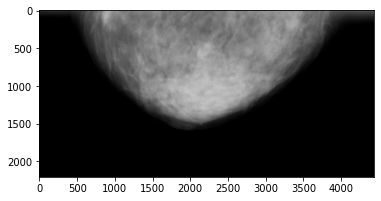

In [ ]:
 
print(df_mass_org["mass shape"][5],df_mass_org.roi_path_drive[5])
print(df_mass_org.roi_path_drive[5])
plt.imshow((img_gg+roii_gg*0).squeeze(),"gray")

In [ ]:
df_mass_org["mass shape"][:200].value_counts()

OVAL                                  68
IRREGULAR                             47
LOBULATED                             39
ROUND                                 23
ARCHITECTURAL_DISTORTION              10
FOCAL_ASYMMETRIC_DENSITY               6
IRREGULAR-ARCHITECTURAL_DISTORTION     5
LOBULATED-IRREGULAR                    1
LOBULATED-ARCHITECTURAL_DISTORTION     1
Name: mass shape, dtype: int64

In [ ]:
df_mass_org = df_mass_org[df_mass_org["mass shape"].isin(["IRREGULAR","OVAL","LOBULATED","ROUND"])].reset_index(drop=True)

In [ ]:
img_scratch = []
roi_scratch = []
labels=[]
n=0
cols=300
for i,j,k in zip(df_mass_org["img_path_drive"],df_mass_org["roi_path_drive"],df_mass_org["mass shape"]):
  if n>200:
    break
 
  if os.path.exists(i) and os.path.exists(j):
    img = image_3D(i)
    #roi = image_3D(j)
    #image_path_array = Image.fromarray(img.astype("uint8")).resize((1024,1024))
    #image_array = np.asarray(image_path_array,"uint8")
    
    #roi_path_array = Image.fromarray(roi.astype("uint8")).resize((1024,1024))
    roi_array,_y,_x = crop_roi(j,cols)#array_resize_array(roi,cols, cols)
    img=img[_y[0]:_y[1],_x[0]:_y[1]]
    image_array =  array_resize_array(img,cols,cols)    
    
    img_scratch.append(image_array)
    roi_scratch.append(roi_array)
    labels.append(k)
    n+=1
  
img_cells=np.array(img_scratch)
roi_cells=np.array(roi_scratch)
labels=np.array(labels)
n_classes=np.unique(labels).size

In [ ]:
#Randomize the order of the input images
s=np.arange(roi_cells.shape[0])
np.random.seed(n_classes)
np.random.shuffle(s)
roi_cells=roi_cells[s]
labels=labels[s]

In [ ]:
img_cells=img_cells[s]

In [ ]:
 from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelss=LabelEncoder().fit_transform(labels)
#Spliting the images into train and validation sets
(X_train,X_val)=roi_cells[(int)(0.2*len(labelss)):],roi_cells[:(int)(0.2*len(labelss))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labelss[(int)(0.2*len(labelss)):],labelss[:(int)(0.2*len(labelss))]
 
#Using one hote encoding for the train and validation labels
 
#y_train = LabelEncoder().fit_transform(y_train)
#y_val = LabelEncoder().fit_transform(y_val)
#
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
 
print(len(y_train))
len(y_val)

161


40

255 0 (300, 300, 1)


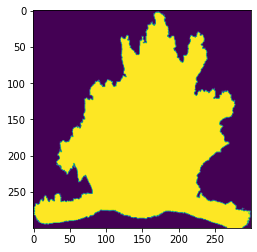

In [ ]:
#roi_array = crop_roi(df_mass_org["roi_path_drive"][11],cols)
#print(df_mass_org["mass shape"][11])
 
gg=roi_cells[10]
print(gg.max(),gg.min(),gg.shape)
plt.imshow(gg.squeeze())#,cmap="gray")

In [ ]:
print(labelss,y_val)

[0 2 0 2 2 3 2 2 0 2 0 2 0 2 0 2 2 1 2 2 2 2 3 2 0 2 2 2 2 2 1 0 1 3 2 3 2
 2 2 3 0 1 0 2 2 0 0 2 2 0 3 2 0 2 2 0 0 2 3 2 1 0 2 2 1 0 1 0 2 1 0 3 1 2
 1 2 2 2 1 3 2 3 0 1 1 2 2 2 2 3 1 1 1 2 0 0 3 2 0 2 2 2 0 0 1 2 0 0 0 2 3
 1 1 3 0 2 0 0 0 2 2 0 3 0 3 3 0 2 0 0 0 1 2 1 1 2 3 0 3 2 3 2 2 0 0 0 1 1
 1 1 1 2 2 3 0 2 2 2 2 1 0 2 0 1 1 1 2 1 2 0 2 2 3 2 1 2 2 1 3 0 0 0 0 0 3
 1 1 2 1 0 2 2 3 2 0 1 1 2 0 1 2] [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0

In [ ]:
X_train.shape

(161, 300, 300, 1)

In [ ]:
import tensorflow as tf
 
data_gen_args = dict(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    #rotation_range=20,
    #width_shift_range=0.02,
    #height_shift_range=0.02,
    #rotation_range = 10,
    # zoom_range = 0.1,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    shear_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False,
    #fill_mode = "nearest"
    )
datagen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
#val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
 
datagen.fit(X_train)

In [ ]:
#Definition of the DNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
 
model = Sequential()
 
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
#model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
 
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu'))
#model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(n_classes, activation='softmax'))
 
 
#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
 
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 296, 296, 16)      416       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 148, 148, 16)      0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 170528)          

Train on 161 samples, validate on 40 samples
Epoch 1/4
161/161 [==============================] - 1s 5ms/step - loss: 5.5042 - accuracy: 0.2981 - val_loss: 1.3838 - val_accuracy: 0.6000
Epoch 2/4
161/161 [==============================] - 1s 4ms/step - loss: 1.3397 - accuracy: 0.3478 - val_loss: 1.3542 - val_accuracy: 0.6000
Epoch 3/4
161/161 [==============================] - 1s 4ms/step - loss: 1.3164 - accuracy: 0.3789 - val_loss: 1.3177 - val_accuracy: 0.6000
Epoch 4/4
161/161 [==============================] - 1s 3ms/step - loss: 1.1256 - accuracy: 0.5590 - val_loss: 1.2294 - val_accuracy: 0.5000


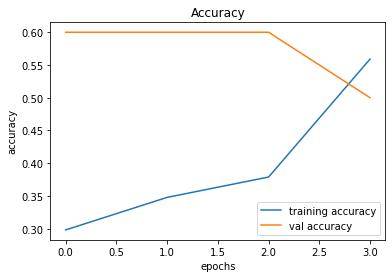

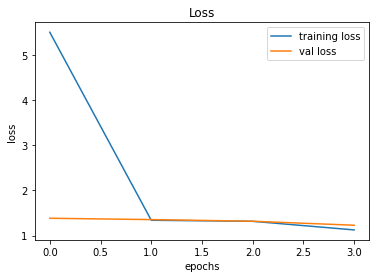

In [ ]:
#using 12 epochs for the training and saving the accuracy for each epoch
#with session.as_default():
#  with session.graph.as_default():
epochs = 4
batch_size=5
history=model.fit(X_train,y_train,#datagen.flow(X_train, y_train, batch_size=batch_size),
                            #steps_per_epoch=X_train.shape[0]//batch_size, 
                            epochs=epochs,batch_size=batch_size,
                            validation_data=(X_val,y_val),
                            # class_weight = classWeight,
                            verbose = 1)
#history = model.fit(X_train, 
#                    y_train, 
#                    batch_size=32, epochs=epochs, 
#                    validation_data=(X_val, y_val))
 
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt
 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
df_mass_org["mass shape"].value_counts()

IRREGULAR                                   351
OVAL                                        321
LOBULATED                                   305
ROUND                                       123
ARCHITECTURAL_DISTORTION                     80
IRREGULAR-ARCHITECTURAL_DISTORTION           45
LYMPH_NODE                                   26
ASYMMETRIC_BREAST_TISSUE                     20
FOCAL_ASYMMETRIC_DENSITY                     19
OVAL-LYMPH_NODE                               6
LOBULATED-IRREGULAR                           5
LOBULATED-LYMPH_NODE                          3
ROUND-OVAL                                    3
LOBULATED-ARCHITECTURAL_DISTORTION            2
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY            2
ROUND-LOBULATED                               1
LOBULATED-OVAL                                1
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION      1
Name: mass shape, dtype: int64

In [ ]:
pred=model.predict_classes(X_val)
#print(pred,y_val)
for i,p in enumerate(pred):
  print("Predicted",p,"Esperado",y_val[i])

Predicted 2 Esperado [1. 0. 0. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [1. 0. 0. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 0. 1.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 0 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [1. 0. 0. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [1. 0. 0. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [1. 0. 0. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [1. 0. 0. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 1. 0. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 0 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 0. 1.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [1. 0. 0. 0.]
Predicted 0 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 2 Esperado [0. 0. 1. 0.]
Predicted 0 Esperado

In [ ]:
from keras.models import load_model
model = load_model(rutadrive+'ddsm_resnet50_s10_[512-512-1024]x2.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
prt_input_1 (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
prt_zero_padding2d_1 (ZeroPaddi (None, None, None, 3 0           prt_input_1[0][0]                
__________________________________________________________________________________________________
prt_conv1 (Conv2D)              (None, None, None, 6 9472        prt_zero_padding2d_1[0][0]       
__________________________________________________________________________________________________
prt_bn_conv1 (BatchNormalizatio (None, None, None, 6 256         prt_conv1[0][0]                  
____________________________________________________________________________________________

In [ ]:
df_mass_val =pd.read_csv(rutadrive+"mass_case_description_val_set_nii_png.csv")


BENIGN


array([[0.22440703, 0.775593  ]], dtype=float32)

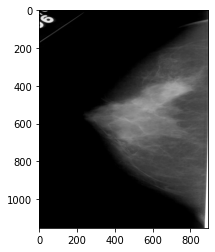

In [ ]:
ind=19
print(df_mass_val.pathology[ind])
sad = np.asarray(Image.open(df_mass_val.img_path_png[ind]))
sad=sad.reshape(sad.shape[0],sad.shape[1],1)
ouput_image = cv2.cvtColor(sad, cv2.COLOR_GRAY2BGR) 
plt.imshow(ouput_image)
model.predict(np.array([ouput_image]))

In [ ]:
img = image_3D(df_mass.image_path[0])
array_img=Image.fromarray(np.rot90(img.astype("uint8"))).resize((896,1152))
# array_img.save("gg.png")

In [ ]:
import os

lista=[]

for i,img_path in enumerate(df_mass_val.image_path):
  p=rutadrive+"ValMasa/"+img_path[-17:-7]+"_"+str(i)+".png"
  lista.append(p)
  if os.path.exists(p):
    continue
  try:
    img = image_3D(img_path)
    array_img=Image.fromarray(np.rot90(img.astype("uint8"))).resize((896,1152))
    array_img.save(p)
  except:
    print("ALV",i)
    continue

df_mass_val["img_path_png"]=lista
df_mass_val.to_csv(rutadrive+"mass_case_description_val_set_nii_png.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for j,p in enumerate(df_mass_val.img_path_png):
  if not os.path.exists(p):
    print(j)

In [ ]:
import shutil

In [ ]:
df_mass=pd.read_csv(rutadrive+"mass_case_description_train_set_nii_png.csv")


In [ ]:
lista=[]
for j,p in zip(df_mass_test.img_path_png,df_mass_test.pathology):
  tmp=j.split("/")
  tmp2="/".join(tmp[:-1])
  tmp3=tmp[-1]
  print(tmp)
  if p =="MALIGNANT":
    l=shutil.move(j,tmp2+"/pos/"+tmp3)
    lista.append(l)
  elif p =="BENIGN":
    l=shutil.move(j,tmp2+"/neg/"+tmp3)
    lista.append(l)

df_mass_test["img_path_png"]=lista
df_mass_test.to_csv(rutadrive+"mass_case_description_test_set_nii_png.csv")


['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_0.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_1.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_2.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_3.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_4.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_5.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_6.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Datasets', 'CBIS-DDMS', 'TestMasa', 'full_mammo_7.png']
['', 'content', 'drive', 'My Drive', 'Materia_integradora', 'Dat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for j,p in enumerate(df_mass_test.img_path_png):
  if not os.path.exists(p):
    print(j)

# GG

In [ ]:
import nibabel as nb
import cv2
import PIL
from scipy import ndimage
from skimage import data,io,exposure 
from skimage.morphology import disk,erosion,white_tophat,dilation,black_tophat
from skimage.filters.rank import tophat
from skimage.filters import gaussian,threshold_otsu
import pywt
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint

In [ ]:
df_mass_train.head()

,patient_name,abnormality type,breast_density,subtlety,assessment,image_path,roi_path,pathology
patient_id,,,,,,,,
P_00001,Mass-Training_P_00001_LEFT_CC,mass,3,4,4,/content/drive/My Drive/Materia_integradora/Da...,/content/drive/My Drive/Materia_integradora/Da...,MALIGNANT
P_00001,Mass-Training_P_00001_LEFT_MLO,mass,3,4,4,/content/drive/My Drive/Materia_integradora/Da...,/content/drive/My Drive/Materia_integradora/Da...,MALIGNANT
P_00004,Mass-Training_P_00004_LEFT_CC,mass,3,3,4,/content/drive/My Drive/Materia_integradora/Da...,/content/drive/My Drive/Materia_integradora/Da...,BENIGN
P_00004,Mass-Training_P_00004_LEFT_MLO,mass,3,3,4,/content/drive/My Drive/Materia_integradora/Da...,/content/drive/My Drive/Materia_integradora/Da...,BENIGN
P_00004,Mass-Training_P_00004_RIGHT_MLO,mass,3,5,4,/content/drive/My Drive/Materia_integradora/Da...,/content/drive/My Drive/Materia_integradora/Da...,BENIGN


In [ ]:
def prepare_img(img_path,rows,cols,value=255):
  img=nb.load(img_path)
  img_255=cv2.normalize(np.asarray(img.dataobj), None, 0, value, cv2.NORM_MINMAX).astype("uint8")
  img_255_cropped=img_255[int(img_255.shape[0]*0.1):int(img_255.shape[0]*0.9), int(img_255.shape[1]*0.05):int(img_255.shape[1]*0.95)]
  img_255_resized=np.asarray(PIL.Image.fromarray(np.rot90(img_255_cropped)).resize((rows,cols)))
  # ouput_image = cv2.cvtColor(img_255_resized, cv2.COLOR_BGR2GRAY) 
  return img_255_resized

def enhance_breast_image(prepared_img,enhance=True):
  # Get a blurred image so edges are soft
  img_gaussian = cv2.GaussianBlur(prepared_img,(75,75),0)

  # Applying the Open operation to close regions in white relative to the breast
  filterSize =(100, 100) 
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,  
                                    filterSize) 
  tophat_img = cv2.morphologyEx(img_gaussian,  
                                cv2.MORPH_OPEN, 
                                kernel)
  # use a threshold to create a mask 
  val = threshold_otsu(tophat_img)
  mask = tophat_img > val
  mask=mask.astype("uint8")
  new=mask*prepared_img
  if enhance:
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(10,10))
    cl = clahe.apply(new)
    return cl.reshape(cl.shape[0],cl.shape[1],1)
  else:
    return new.reshape(new.shape[0],new.shape[1],1)


In [ ]:
df_train=df_mass_train[["image_path","pathology"]][:200].append(df_calc_train[["image_path","pathology"]][:200],True)
df_train=df_train.append(df_normals_train[["image_path","pathology"]][:200],True)

In [ ]:
df_test=df_mass_test[["image_path","pathology"]][:30].append(df_calc_test[["image_path","pathology"]][:30],True)
df_test=df_test.append(df_normals_test[["image_path","pathology"]][:30],True)

In [ ]:
df_val=df_mass_val[["image_path","pathology"]][:10].append(df_calc_val[["image_path","pathology"]][:10],True)
df_val=df_val.append(df_normals_val[["image_path","pathology"]][:10],True)

In [ ]:
cleanup_nums = {"pathology": {"MALIGNANT":2 , "BENIGN":1,"NORMAL": 0}}

In [ ]:
df_train.replace(cleanup_nums,inplace=True)
df_test.replace(cleanup_nums,inplace=True)
df_val.replace(cleanup_nums,inplace=True)

In [ ]:
df_val

,image_path,pathology
0,/content/drive/My Drive/Materia_integradora/Da...,1
1,/content/drive/My Drive/Materia_integradora/Da...,1
2,/content/drive/My Drive/Materia_integradora/Da...,1
3,/content/drive/My Drive/Materia_integradora/Da...,1
4,/content/drive/My Drive/Materia_integradora/Da...,1
5,/content/drive/My Drive/Materia_integradora/Da...,1
6,/content/drive/My Drive/Materia_integradora/Da...,2
7,/content/drive/My Drive/Materia_integradora/Da...,2
8,/content/drive/My Drive/Materia_integradora/Da...,1
9,/content/drive/My Drive/Materia_integradora/Da...,1


In [ ]:
height = 1152
width = 896
channels = 1
classes = 3#[0,1,2,3,4,5,6,7]
n_classes=classes#len(classes)
n_inputs = height * width*channels

def load_images(df,w=896,h=1152,expand=False):
  data=[]
  labels=[]
  for path,patology in zip(df.image_path,df.pathology):
    img=prepare_img(path,w,h)
    e_img=enhance_breast_image(img)
    # image_from_array=e_img.reshape(e_img.shape[0],e_img.shape[1],1)
    image = np.asarray(cv2.cvtColor(e_img, cv2.COLOR_GRAY2BGR))
    if expand:
      image = np.expand_dims(image, axis=0)
      image = imagenet_utils.preprocess_input(image)
    data.append(image)
    labels.append(patology)

  X=np.array(data)
  Y=np.array(labels)
  return X,Y

def randomize_order(X,Y,n_class=3):
  s=np.arange(X.shape[0])
  np.random.seed(n_class)
  np.random.shuffle(s)
  _X=X[s]
  _Y=Y[s]
  return _X,_Y

In [ ]:
Cells,labels=load_images(df_train)
Cells,labels=randomize_order(Cells,labels)

1


(1152, 896, 3)

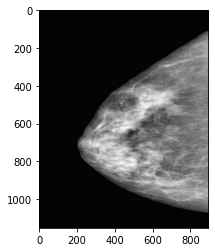

In [ ]:
print(labels[-2])
plt.imshow(Cells[-2].squeeze())

Cells[-2].squeeze().shape

In [ ]:
Cells_test,labels_test=load_images(df_test)
Cells_test,labels_test=randomize_order(Cells_test,labels_test)

0


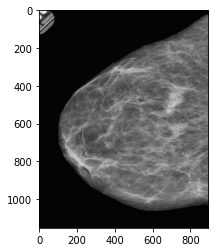

In [ ]:
print(labels_test[0])
plt.imshow(Cells_test[0].squeeze())

In [ ]:
Cells_val,labels_val=load_images(df_val)
Cells_val,labels_val=randomize_order(Cells_val,labels_val)

2


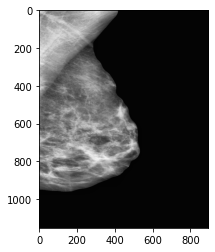

In [ ]:
print(labels_val[0])
plt.imshow(Cells_val[0].squeeze())

In [ ]:
#Spliting the images into train and validation sets
# (X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = Cells.astype('float32')/255 
X_test = Cells_test.astype('float32')/255
X_val = Cells_val.astype('float32')/255
# (y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(labels, n_classes)
y_test = to_categorical(labels_test, n_classes)
y_val = to_categorical(labels_val, n_classes)

print(len(y_train))
len(y_val)

600


30

In [ ]:
from keras.applications import VGG16
model = VGG16(include_top=False,weights=None)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
def create_features(data, pre_model):
    x = np.vstack(data)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [ ]:
train_x, train_features, train_features_flatten = create_features(X_train, model)
val_x, val_features, val_features_flatten = create_features(X_val, model)
test_x, test_features, test_features_flatten = create_features(X_test, model)
 
print(train_x.shape, train_features.shape, train_features_flatten.shape)
print(val_x.shape, val_features.shape, val_features_flatten.shape)
print(test_x.shape, test_features.shape, test_features_flatten.shape)

(600, 224, 224, 3) (600, 7, 7, 512) (600, 25088)
(80, 224, 224, 3) (80, 7, 7, 512) (80, 25088)
(90, 224, 224, 3) (90, 7, 7, 512) (90, 25088)


In [ ]:
import tensorflow as tf

data_gen_args = dict(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    #rotation_range=20,
    #width_shift_range=0.15,
    #height_shift_range=0.15,
    # rotation_range = 10,
    # zoom_range = 0.15,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    # shear_range = 0.15,
    horizontal_flip = False,
    vertical_flip = False,
    # fill_mode = "nearest"
    )
datagen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
#val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

datagen.fit(X_train)
#val_datagen.fit(X_val)

In [ ]:
#Definition of the DNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,GlobalAveragePooling2D

mymodel = Sequential()

mymodel.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
mymodel.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
mymodel.add(MaxPool2D(pool_size=(2, 2)))
mymodel.add(Dropout(rate=0.25))

mymodel.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
mymodel.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
mymodel.add(MaxPool2D(pool_size=(2, 2)))
mymodel.add(Dropout(rate=0.25))

mymodel.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))

mymodel.add(Flatten())
mymodel.add(Dropout(rate=0.25))
mymodel.add(Dense(256,activation='relu'))
mymodel.add(Dense(n_classes, activation='softmax'))


#Compilation of the model
mymodel.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

mymodel.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 216, 216, 32)      25632     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 108, 108, 32)      0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 106, 106, 64)      18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 104, 104, 64)      36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 52, 52, 64)      

In [ ]:
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)

Epoch 1/20
40/40 [==============================] - 5s 133ms/step - loss: 1.5491 - accuracy: 0.3400 - val_loss: 1.0993 - val_accuracy: 0.3778
Epoch 2/20
40/40 [==============================] - 4s 98ms/step - loss: 1.0871 - accuracy: 0.3833 - val_loss: 1.0876 - val_accuracy: 0.4000
Epoch 3/20
40/40 [==============================] - 4s 97ms/step - loss: 1.0751 - accuracy: 0.3950 - val_loss: 1.0844 - val_accuracy: 0.4111
Epoch 4/20
40/40 [==============================] - 4s 98ms/step - loss: 1.0722 - accuracy: 0.3850 - val_loss: 1.0909 - val_accuracy: 0.3667
Epoch 5/20
40/40 [==============================] - 4s 98ms/step - loss: 1.0585 - accuracy: 0.3917 - val_loss: 1.0948 - val_accuracy: 0.3111
Epoch 6/20
40/40 [==============================] - 4s 97ms/step - loss: 1.0245 - accuracy: 0.4367 - val_loss: 1.1020 - val_accuracy: 0.3111
Epoch 7/20
40/40 [==============================] - 4s 97ms/step - loss: 1.0062 - accuracy: 0.4800 - val_loss: 1.2171 - val_accuracy: 0.3667
Epoch 8/20
4

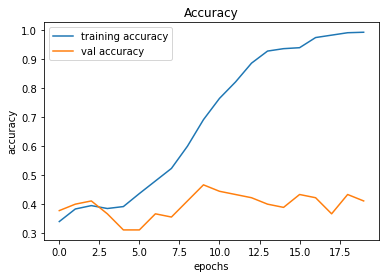

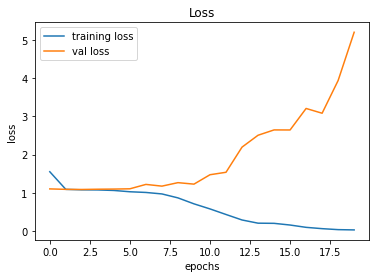

In [ ]:
#using 12 epochs for the training and saving the accuracy for each epoch
#with session.as_default():
#  with session.graph.as_default():
epochs = 20
batch_size=15
history=mymodel.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=X_train.shape[0]//batch_size, 
                            epochs=epochs, 
                            validation_data=(X_test,y_test),
                            # class_weight = classWeight,
                            verbose = 1)
# history = mymodel.fit(train_x, y_train, batch_size=batch_size, epochs=epochs,
#           validation_data=(val_x, y_val), callbacks=[checkpointer],
#           verbose=1, shuffle=True)

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
pred=mymodel.predict_classes(X_val)
print(pred)
print(y_val)
a=accuracy_score(labels_val, pred)
c=classification_report(labels_val, pred)
print(a)
print(c)

[2 0 2 0 0 1 0 0 2 2 0 0 1 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
0.26666666666666666
              precision    recall  f1-score   support

           0       0.35      0.70      0.47        10
           1       0.00      0.00      0.00        11
           2       0.17      0.11      0.13         9

    accuracy                           0.27        30
   macro avg       0.17      0.27      0.20        30
weighted avg       0.17      0.27      0.20        30



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
# Importing hypopt library for grid search
!pip install hypopt
from hypopt import GridSearch
 
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

In [ ]:
labels

array([2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0,
       1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0,
       1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1])

In [ ]:
param_grid = [{'C': [0.1,1,10],'solver': ['newton-cg','lbfgs']}]
 
# Grid-search all parameter combinations using a validation set.
opt = GridSearch(model = LogisticRegression(class_weight='balanced', multi_class="auto",
                        max_iter=200, random_state=1),param_grid = param_grid)
 
opt.fit(train_features_flatten, labels, val_features_flatten, labels_val, scoring = 'accuracy')
# print(opt.get_best_params())

In [ ]:
lr=LogisticRegression(class_weight='balanced', multi_class="auto",
                        max_iter=500, random_state=1)

In [ ]:
lr.fit(train_features_flatten,labels)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predd=lr.predict(test_features_flatten)

In [ ]:
for p,e in zip(predd,labels_test):
  print("Predicted {} Esperado {}".format(p,e))

Predicted 0 Esperado 0
Predicted 0 Esperado 1
Predicted 0 Esperado 0
Predicted 2 Esperado 2
Predicted 2 Esperado 2
Predicted 0 Esperado 1
Predicted 1 Esperado 2
Predicted 2 Esperado 1
Predicted 2 Esperado 2
Predicted 2 Esperado 1
Predicted 2 Esperado 2
Predicted 0 Esperado 1
Predicted 0 Esperado 0
Predicted 0 Esperado 1
Predicted 0 Esperado 1
Predicted 0 Esperado 2
Predicted 2 Esperado 0
Predicted 0 Esperado 0
Predicted 0 Esperado 1
Predicted 2 Esperado 0
Predicted 0 Esperado 0
Predicted 1 Esperado 2
Predicted 2 Esperado 2
Predicted 2 Esperado 0
Predicted 0 Esperado 1
Predicted 2 Esperado 1
Predicted 2 Esperado 2
Predicted 1 Esperado 0
Predicted 2 Esperado 0
Predicted 1 Esperado 1
Predicted 2 Esperado 0
Predicted 2 Esperado 0
Predicted 0 Esperado 1
Predicted 2 Esperado 0
Predicted 2 Esperado 2
Predicted 1 Esperado 1
Predicted 1 Esperado 2
Predicted 0 Esperado 1
Predicted 0 Esperado 0
Predicted 0 Esperado 2
Predicted 0 Esperado 1
Predicted 2 Esperado 2
Predicted 1 Esperado 1
Predicted 2